In [5]:
import numpy as np

# Biases: Materials Project minus Experimental formation energy (eV/fu)
bias = {}
bias['Mn'] = -3.958 + 3.528
bias['Zn'] = -3.286 + 2.954
bias['Ti'] = -9.948 + 9.213


species_data = {}

# Database of experimental free energies plus Materials Project bias (eV/fu)

species_data = [
    {
        'name': 'Mn$^{2+}$',
        'formula_str': 'Mn',
        'phase': 'ion',
        'charge': +2,
        'Ef': -2.387 + bias['Mn']
    },
    {
        'name': 'MnO$_4$$^{2-}$',
        'formula_str': 'MnO4',
        'phase': 'ion',
        'charge': -2,
        'Ef': -5.222 + bias['Mn']
    },
    {
        'name': 'MnHO$_2$$^{-}$',
        'formula_str': 'MnHO2',
        'phase': 'ion',
        'charge': -1,
        'Ef': -5.243 + bias['Mn']
    },
    {
        'name': 'Mn$^{3+}$',
        'formula_str': 'Mn',
        'phase': 'ion',
        'charge': +3,
        'Ef': -0.850 + bias['Mn']
    },  
    {
        'name': 'MnO$_4$$^{-}$',
        'formula_str': 'MnO4',
        'phase': 'ion',
        'charge': -1,
        'Ef': -4.658 + bias['Mn']
    },  
    {
        'name': 'MnO',
        'formula_str': 'MnO',
        'phase': 'solid',
        'charge': 0,
        'Ef': -3.958
    },
    {
        'name': 'MnO$_2$',
        'formula_str': 'MnO2',
        'phase': 'solid',
        'charge': 0,
        'Ef': -5.469
    },
    {
        'name': 'Mn$_3$O$_4$',
        'formula_str': 'Mn3O4',
        'phase': 'solid',
        'charge': 0,
        'Ef': -14.350
    },
    {
        'name': 'Mn',
        'formula_str': 'Mn',
        'phase': 'solid',
        'charge': 0,
        'Ef': 0.0
    },


    {
        'name': 'Zn$^{2+}$',
        'formula_str': 'Zn',
        'phase': 'ion',
        'charge': +2,
        'Ef': -1.525 + bias['Zn']
    },    
    {
        'name': 'ZnO$_2$$^{aq}$',
        'formula_str': 'ZnO2',
        'phase': 'ion',
        'charge': 0,
        'Ef': -2.921 + bias['Zn']
    }, 
    {
        'name': 'ZnOH$^{+}$',
        'formula_str': 'ZnOH',
        'phase': 'ion',
        'charge': +1,
        'Ef': -3.518 + bias['Zn']
    },     
    {
        'name': 'ZnO$_2$$^{2-}$',
        'formula_str': 'ZnO2',
        'phase': 'ion',
        'charge': -2,
        'Ef': -4.042 + bias['Zn']
    }, 
    {
        'name': 'ZnHO$_2$$^{-}$',
        'formula_str': 'ZnHO2',
        'phase': 'ion',
        'charge': -1,
        'Ef': -4.810 + bias['Zn']
    }, 
    {
        'name': 'ZnO',
        'formula_str': 'ZnO',
        'phase': 'solid',
        'charge': 0,
        'Ef': -3.286
    },
    {
        'name': 'Zn',
        'formula_str': 'Zn',
        'phase': 'solid',
        'charge': 0,
        'Ef': 0.0
    }, 


    {
        'name': 'Ti$^{2+}$',
        'formula_str': 'Ti',
        'phase': 'ion',
        'charge': +2,
        'Ef': -3.257 + bias['Ti']
    },
    {
        'name': 'Ti$^{3+}$',
        'formula_str': 'Ti',
        'phase': 'ion',
        'charge': +3,
        'Ef': -3.626 + bias['Ti']
    },
    {
        'name': 'TiO$^{2+}$',
        'formula_str': 'TiO',
        'phase': 'ion',
        'charge': +2,
        'Ef': -4.843 + bias['Ti']
    },
    {
        'name': 'TiHO$_3$$^{-}$',
        'formula_str': 'TiHO3',
        'phase': 'ion',
        'charge': -1,
        'Ef': -9.908 + bias['Ti']
    },
    {
        'name': 'TiO$_2$$^{2+}$',
        'formula_str': 'TiO2',
        'phase': 'ion',
        'charge': +2,
        'Ef': -4.845 + bias['Ti']
    },
    {
        'name': 'TiO$_2$',
        'formula_str': 'TiO2',
        'phase': 'solid',
        'charge': 0,
        'Ef': -9.948
    },
    {
        'name': 'Ti',
        'formula_str': 'Ti',
        'phase': 'solid',
        'charge': 0,
        'Ef': 0.0
    },



    {
        'name': 'TiMnO$_3$',
        'formula_str': 'TiMnO3',
        'phase': 'solid',
        'charge': 0,
        'Ef': -14.775
    }
]


import re

# Function to parse chemical formulas
def parse_formula(formula):
    # Updated regex pattern to capture decimal numbers
    pattern = r'([A-Z][a-z]*)(\d*\.?\d*)'
    tokens = re.findall(pattern, formula)
    formula_dict = {}
    for (element, count) in tokens:
        if count == '':
            count = 1.0  # Default to 1.0 for elements without a count
        else:
            count = float(count)  # Convert to float to handle decimal numbers
        formula_dict[element] = formula_dict.get(element, 0) + count
    return formula_dict

# Parse the formulas
for data in species_data:
    if 'formula_str' in data:
        data['formula'] = parse_formula(data['formula_str'])
    else:
        data['formula'] = parse_formula(data['name'])


# Function to calculate Gibbs free energy for each species at each point
def get_dG(species_A, species_B, conc_A, conc_B, Gf_AB_alloy, pH, V):
    """
    Calculate gibbs energy for given binary alloy where one element decomposes into an ion.

    """
    # Get number of O, H, and charge in the two compounds
    yA = species_A['formula'].get('O', 0)
    zA = species_A['formula'].get('H', 0)
    cA = species_A['charge']

    yB = species_B['formula'].get('O', 0)
    zB = species_B['formula'].get('H', 0)
    cB = species_B['charge']


    # Get number of H2O, H^+, e^-
    nH2O = conc_A * yA + conc_B * yB
    nH = 2 * nH2O - (conc_A * zA + conc_B * zB)
    nEl = nH + conc_A * cA + conc_B * cB

    # Get free energies
    GfA = species_A['Ef'] # in eV/fu
    GfB = species_B['Ef'] # in eV/fu
    GfH2O = -2.46      # in eV/fu
    GfAB = Gf_AB_alloy # in eV/fu

    # Ion indicators
    if cA == 0:
        kA = 0
    else:
        kA = 1
    
    if cB == 0:
        kB = 0
    else:
        kB = 1

    # Claculate modifed free energy
    dG = conc_A * GfA + conc_B * GfB - GfAB - nH2O * GfH2O + 0.0591 * (conc_A * kA * np.log10(10**(-6)) + conc_B * kB * np.log10(10**(-6))) - 0.0591 * nH * pH - nEl * V

    return dG

def get_Gf_oxide(el_A, el_B, conc_A, conc_B, gamma, model, p_dict_oh_t):

    x_A = p_dict_oh_t[el_A]
    x_B = p_dict_oh_t[el_B]
    x_O = p_dict_oh_t['O']

    x = (1 - gamma) * conc_A * x_A + (1 - gamma) * conc_B * x_B + gamma * x_O

    E = model(x)

    # grad_x = torch.autograd.grad(
    #     outputs=E,
    #     inputs=x,
    #     create_graph=True,
    #     retain_graph=True
    # )[0]

    return E.item()

def get_Gf_alloy(el_A, el_B, conc_A, conc_B, model, p_dict_oh_t):

    x_A = p_dict_oh_t[el_A]
    x_B = p_dict_oh_t[el_B]

    x = conc_A * x_A + conc_B * x_B

    E = model(x)

    # grad_x = torch.autograd.grad(
    #     outputs=E,
    #     inputs=x,
    #     create_graph=True,
    #     retain_graph=True
    # )[0]

    return E.item()


def total_gibbs(species_data, el_A, el_B, conc_A, conc_B, model, pH, V):
    Gf_AB_alloy = get_Gf_alloy(el_A, el_B, conc_A, conc_B, model, p_dict_oh_t)
    species_A = []
    species_B = []
    for data in species_data:
        if el_A in data['formula']:
            species_A.append(data)
        elif el_B in data['formula']:
            species_B.append(data)

    ge = []
    decomps = []
    for data_A in species_A:
        for data_B in species_B:
            if data_A['phase'] == 'ion' or data_B['phase'] == 'ion':
                phase = 'ion'
            else:
                phase = 'solid'
            decomps.append({'name': f"{data_A['name']} + {data_B['name']}", 'phase': phase})
            ge.append(get_dG(data_A, data_B, conc_A, conc_B, Gf_AB_alloy, pH, V))
    
    ge_array = np.array(ge)
    min_ge = np.min(ge_array)

    min_index = np.argmin(ge_array)
    min_decomp = decomps[min_index]

    return min_ge, min_decomp

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from adjustText import adjust_text

# ── Global matplotlib style (LaTeX fonts, larger text) ──────────────
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "DejaVu Sans"],
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.labelsize": 32,
    "axes.titlesize": 38,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
})

# Composition grid
conc_As = np.linspace(0.1, 0.9, 9)

# Master pH/E grid
NGrid    = 100
pH_range = np.linspace(-2, 16, NGrid)
V_range  = np.linspace(-2,  4,  NGrid)
pH_grid, V_grid = np.meshgrid(pH_range, V_range)

# Loop over compositions
for k, conc_A in enumerate(conc_As):
    el_A, el_B = "Ti", "Mn"
    conc_B     = 1 - conc_A
    
    # ── Stability analysis over the grid ────────────────────────────
    stable_species = []
    for i, pH in enumerate(pH_range):
        row_species = []
        for j, V in enumerate(V_range):
            # (1) Mixed‑oxide candidate
            O_conc, ge_MO = 0.6, 
            O_string = (f"{el_A}$_{{{conc_A*(1-O_conc):.2f}}}$"
                        f"{el_B}$_{{{conc_B*(1-O_conc):.2f}}}$"
                        f"O$_{{{O_conc:.2f}}}$")
            species_O = {"name": O_string, "phase": "solid"}

            # (2) Minimal‑G decomposition
            min_ge, min_decomp = total_gibbs(
                species_data, el_A, el_B, conc_A, conc_B,
                combined_model, pH, V
            )

            row_species.append(species_O if ge_MO <= min_ge else min_decomp)
        stable_species.append(row_species)

    # ── Map each distinct phase to an integer ───────────────────────
    unique_species_info = {}
    for i in range(NGrid):
        for j in range(NGrid):
            s = stable_species[i][j]
            if s["name"] not in unique_species_info:
                unique_species_info[s["name"]] = {"phase": s["phase"]}

    species_names   = sorted(unique_species_info.keys())
    species_to_int  = {n: idx for idx, n in enumerate(species_names)}

    stable_int = np.zeros((NGrid, NGrid), dtype=int)
    for i in range(NGrid):
        for j in range(NGrid):
            stable_int[i, j] = species_to_int[stable_species[i][j]["name"]]
    stable_int = stable_int.T  # pcolormesh expects (x,y) orientation

    # ── Colour map: light‑blue = solid, beige = other ───────────────
    color_list = ["#ADD8E6" if unique_species_info[n]["phase"] == "solid"
                  else "#F5DEB3" for n in species_names]
    cmap  = mcolors.ListedColormap(color_list)
    bnds  = np.arange(stable_int.min()-0.5, stable_int.max()+1.5)
    norm  = mcolors.BoundaryNorm(bnds, len(color_list))

    # ── Plot ────────────────────────────────────────────────────────
    fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
    ax.pcolormesh(pH_grid, V_grid, stable_int,
                  cmap=cmap, norm=norm, shading="nearest")

    # Label phases at centre of mass
    texts = []
    for idx, name in enumerate(species_names):
        mask = stable_int == idx
        if mask.any():
            y_idx, x_idx = np.where(mask)
            mean_pH = pH_range[int(round(x_idx.mean()))]
            mean_E  = V_range[int(round(y_idx.mean()))]
            texts.append(ax.text(mean_pH, mean_E, name,
                                 ha="center", va="center",
                                 fontsize=28, weight="bold"))
    adjust_text(texts, ax=ax, expand_points=(3, 3))

    # Water stability lines
    E_O2 = 1.229 - 0.0591 * pH_range
    E_H2 =        -0.0591 * pH_range
    ax.plot(pH_range, E_O2, "--", lw=2.0, color="red",  label=r"$\mathrm{O_2/H_2O}$")
    ax.plot(pH_range, E_H2, "--", lw=2.0, color="blue", label=r"$\mathrm{H^+/H_2}$")

    # Axes, limits, legend
    ax.set_xlim(-2, 16)
    ax.set_xticks(np.arange(-2, 17, 2))
    ax.set_ylim(-2,  4)
    ax.set_xlabel(r"pH")
    ax.set_ylabel(r"V vs.\ SHE")

    fig.tight_layout()
    fig.savefig(f"pourbaix_dft/TiMn_{k}.png", dpi=300)
    plt.close(fig)


IndexError: list index out of range

Retrieving ThermoDoc documents: 100%|██████████| 349/349 [00:00<00:00, 12511214.50it/s]


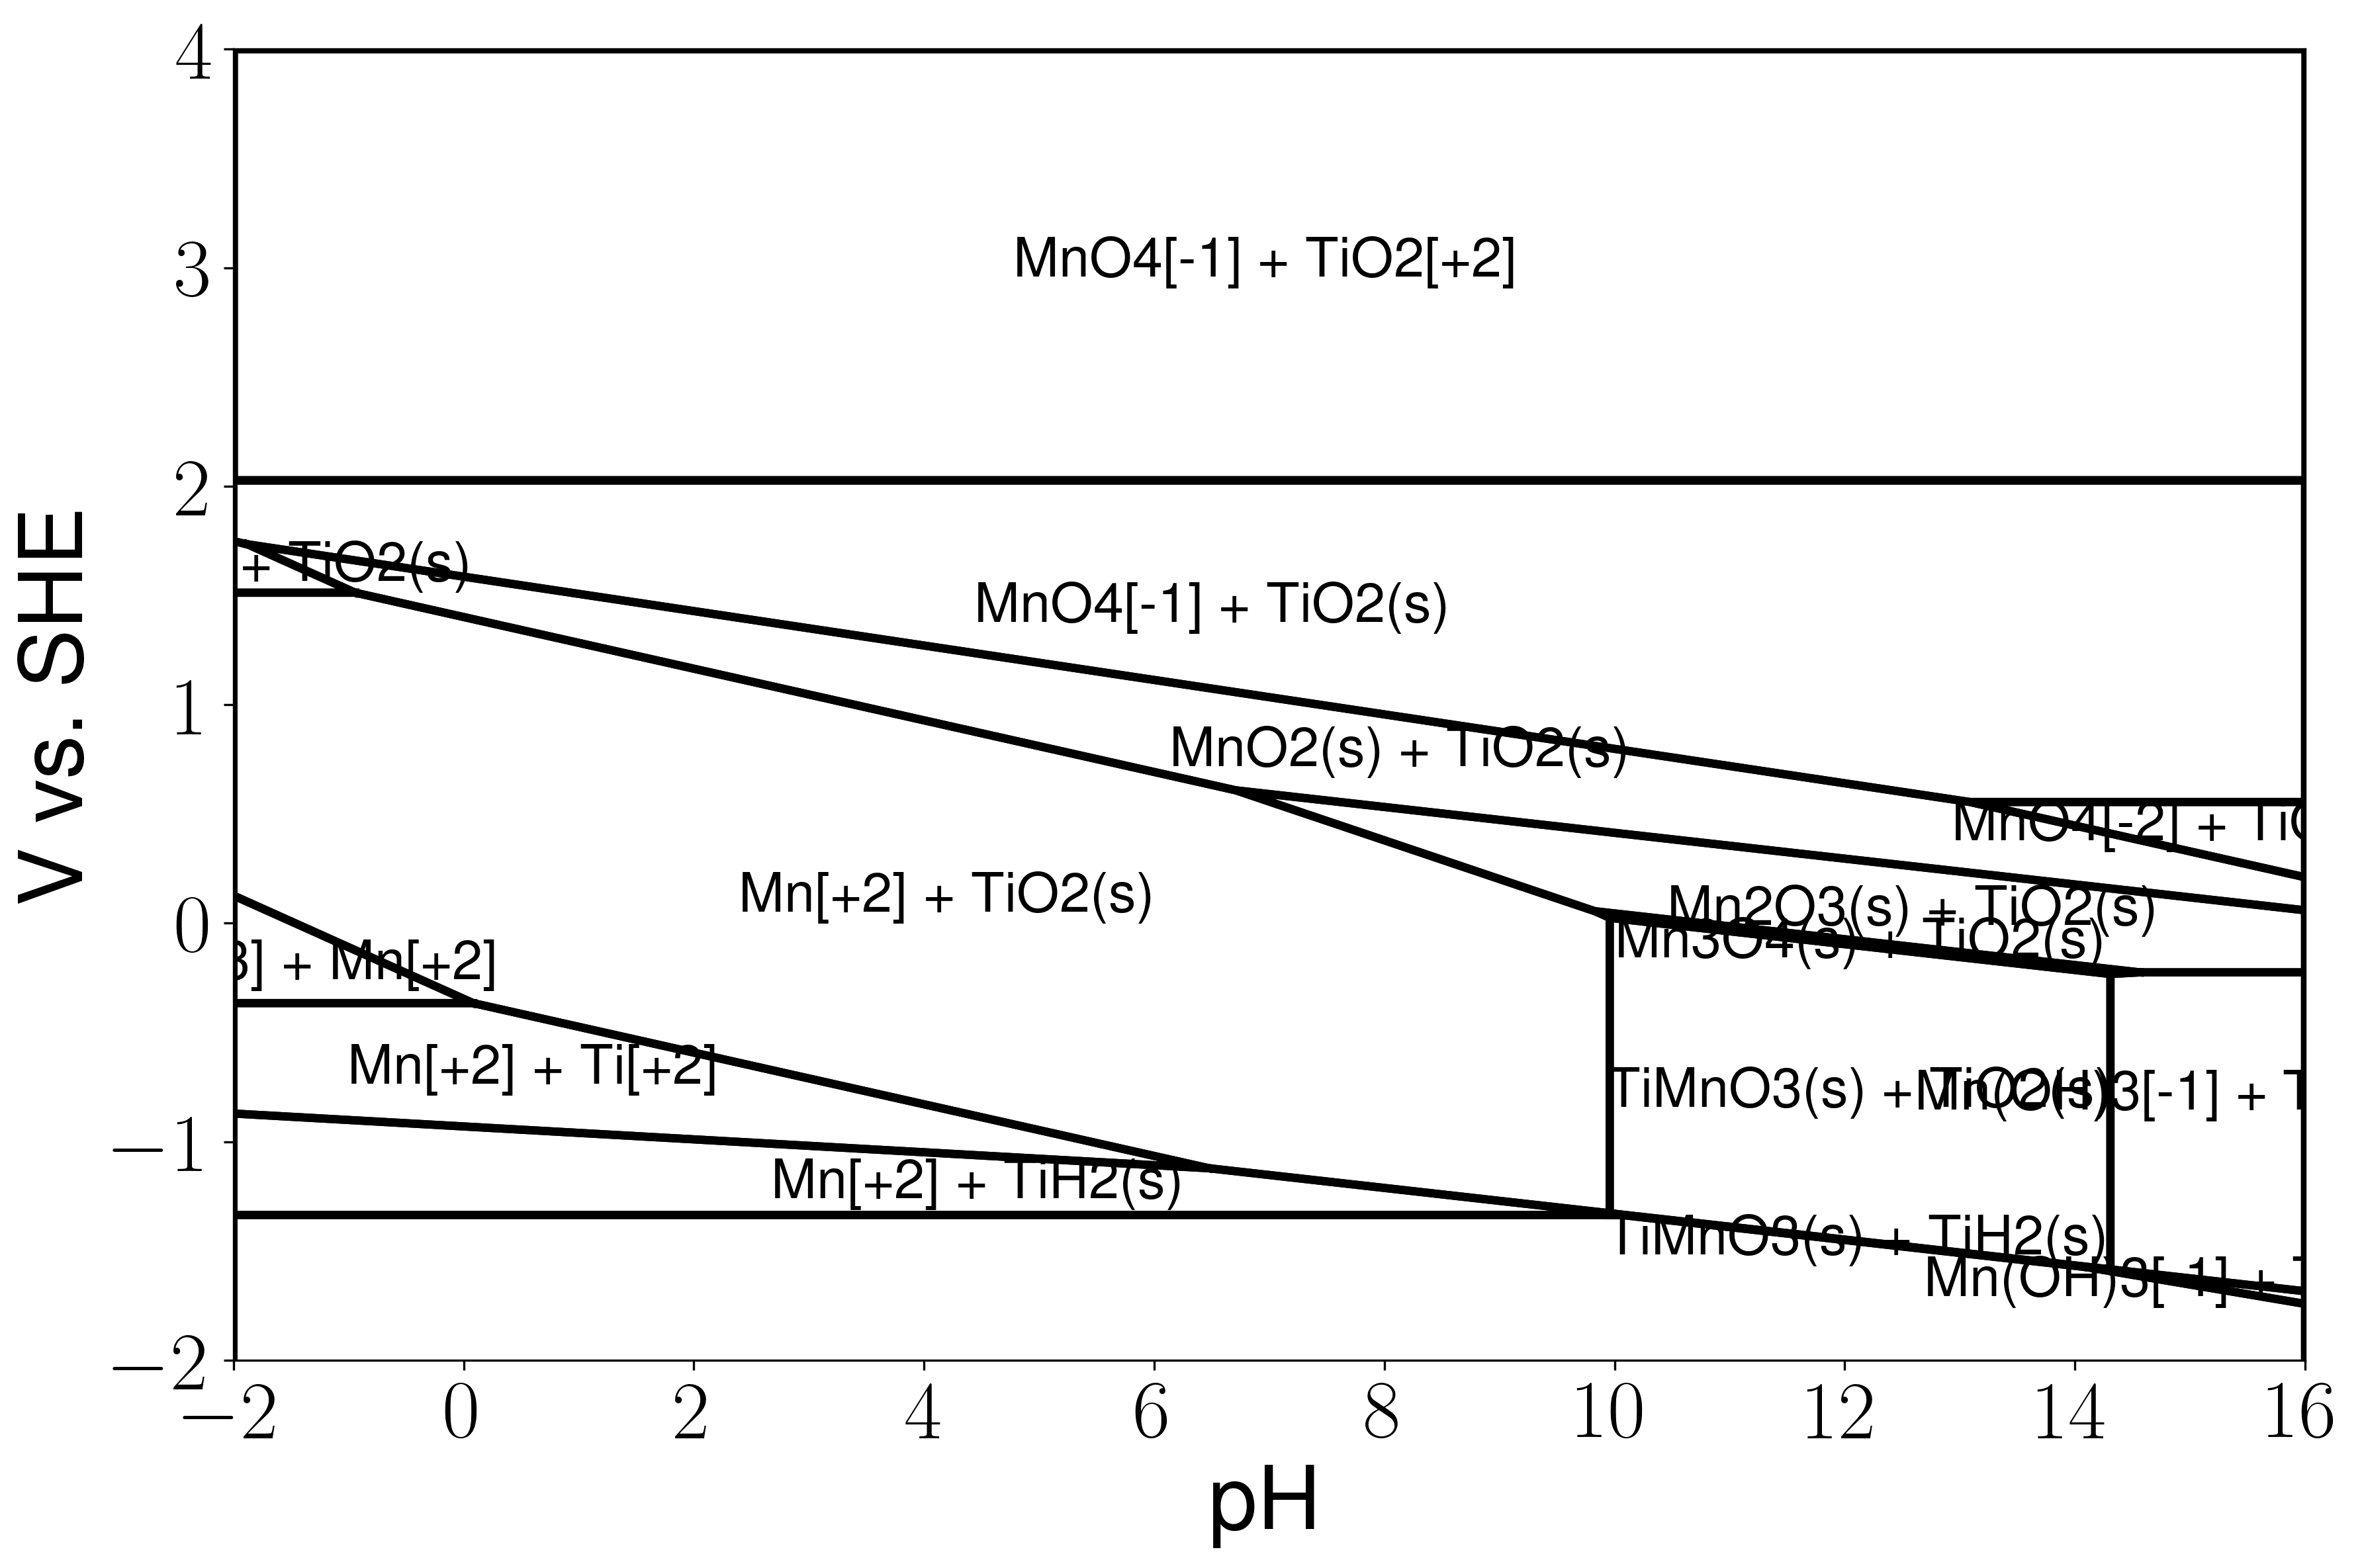

In [66]:
from mp_api.client import MPRester
from pymatgen.analysis.pourbaix_diagram import PourbaixDiagram, PourbaixPlotter
import matplotlib.pyplot as plt

# ── Global matplotlib style (LaTeX fonts, larger text) ──────────────
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "DejaVu Sans"],
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.labelsize": 32,
    "axes.titlesize": 38,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
})


with MPRester(API_KEY) as mpr:
    entries = mpr.get_pourbaix_entries(["Ti", "Mn"])  # full data fetch works here

diagram = PourbaixDiagram(
    entries,
    comp_dict={"Ti": 0.9, "Mn": 0.1},
    filter_solids=True
    )
plotter = PourbaixPlotter(diagram)

fig, ax = plt.subplots(figsize=(12,8), dpi=300)
plotter.get_pourbaix_plot(ax=ax, show_water_lines=False, label_fontsize=20, show_neutral_axes=False)  # no limits dict → avoids the string cast path
ax.set_xlim(-2, 16)
ax.set_ylim(-2, 4)
ax.set_ylabel(r"V vs.\ SHE")

from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


for txt in ax.texts:
    txt.set_color("black")
    txt.set_clip_on(True)
    txt.set_clip_path(ax.patch)


plt.tight_layout(); plt.savefig("pourbaix_dft/TiMn_8.png", dpi=300)